# Import modules

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Import PKL Data

In [2]:
path_clean = '../data/modified/trees_clean.pkl'
trees_clean = pd.read_pickle(path_clean)

In [3]:
trees_clean

,SOUS_CATEGORIE_DESC,CODE_PARENT_DESC,ADR_SECTEUR,GENRE_BOTA,ESPECE,STADEDEDEVELOPPEMENT,ANNEEDEPLANTATION,COLLECTIVITE,longitude,latitude
0,Arbre d'espaces ouverts,Tr quartiers talu architecture,6,Pinus,NaN,Arbre adulte,1975.0,Ville de Grenoble,5.733052,45.160874
1,Arbre d'espaces ouverts,Désserte des alisiers mail,6,Platanus,acerifolia,Arbre adulte,1975.0,Ville de Grenoble,5.739665,45.163463
2,Arbre d'espaces ouverts,Désserte des alisiers mail,6,Platanus,acerifolia,Arbre adulte,1975.0,Ville de Grenoble,5.739376,45.163737
3,Arbre d'espaces ouverts,La piste pel de l'aire de jeux,6,Carpinus,betulus,Arbre adulte,1975.0,Ville de Grenoble,5.732758,45.165827
4,Arbre de voirie,R Salengro sép Libé Schweitz,3,Cercis,siliquastrum,Arbre adulte,2006.0,Grenoble Alpes Métropole,5.710181,45.175196
...,...,...,...,...,...,...,...,...,...,...
31590,Arbre d'espaces ouverts,Cité Moyrand R Condé,5,Pyrus,calleryana,NaN,2020.0,Ville de Grenoble,5.743831,45.178852
31591,Arbre d'espaces ouverts,Cité Moyrand R Condé,5,Pyrus,calleryana,NaN,2020.0,Ville de Grenoble,5.743933,45.178801
31592,Arbre d'espaces ouverts,Cité Moyrand R Condé,5,Pyrus,calleryana,NaN,2020.0,Ville de Grenoble,5.743839,45.178747
31608,Arbre de voirie,R M Gontard angle M Deprez,2,Prunus,serrulata,Arbre adulte,1995.0,Grenoble Alpes Métropole,5.724211,45.192098


In [4]:
trees_clean.columns

Index(['SOUS_CATEGORIE_DESC', 'CODE_PARENT_DESC', 'ADR_SECTEUR', 'GENRE_BOTA',
       'ESPECE', 'STADEDEDEVELOPPEMENT', 'ANNEEDEPLANTATION', 'COLLECTIVITE',
       'longitude', 'latitude'],
      dtype='object')

In [11]:
trees_clean['ESPECE'] = trees_clean['ESPECE'].map(str).replace('nan',' ')
trees_clean['GENRE_BOTA'] = trees_clean['GENRE_BOTA'].map(str).replace('nan',' ')

In [16]:
trees_clean['BIO'] = trees_clean['GENRE_BOTA'] + " " + trees_clean['ESPECE']
trees_clean = trees_clean.drop(['GENRE_BOTA','ESPECE'],axis=1)

# Visualisation after cleaning

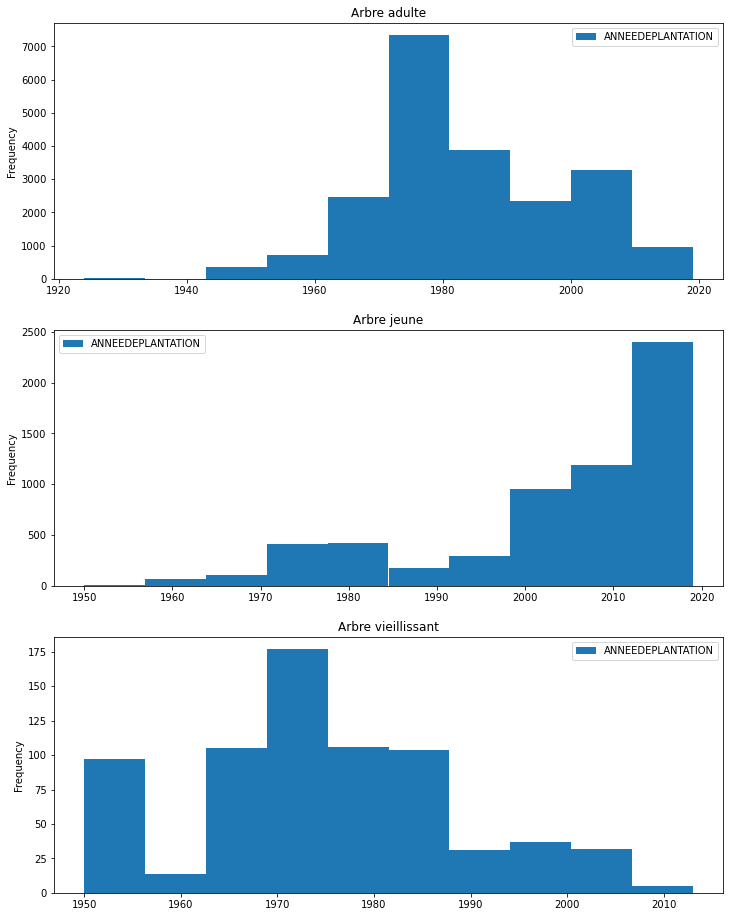

In [24]:
trees_clean.plot(kind='hist',column='ANNEEDEPLANTATION',by='STADEDEDEVELOPPEMENT',subplots=True,figsize=(12,16));

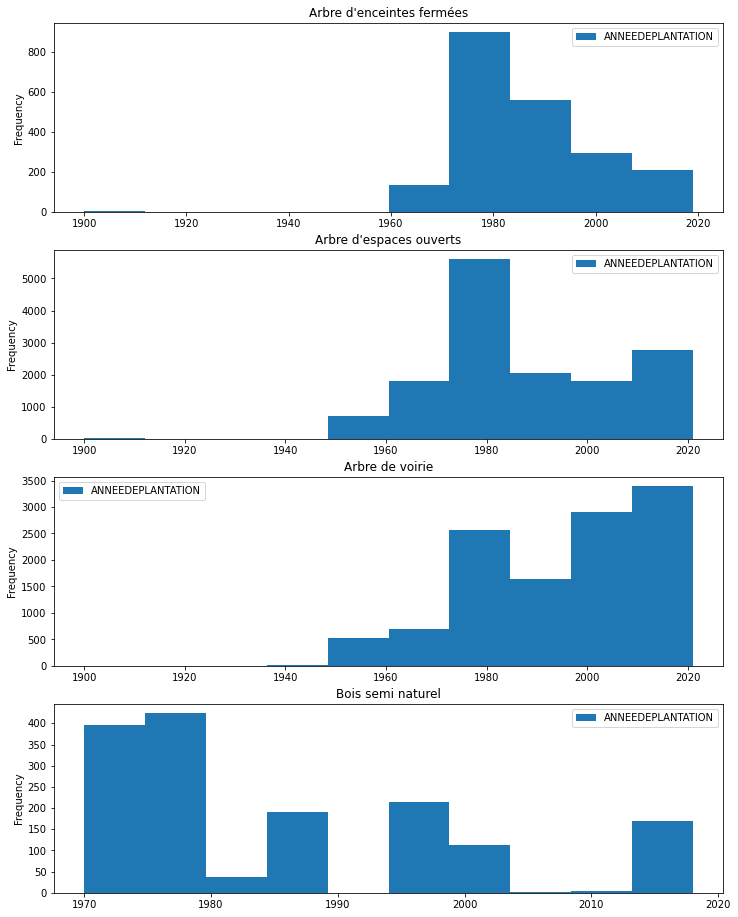

In [25]:
trees_clean.plot(kind='hist',column='ANNEEDEPLANTATION',by='SOUS_CATEGORIE_DESC',subplots=True,figsize=(12,16));

# Generation of train_test sets

# ML Pipeline

# ML hyperparameter tuning